# Support Vector Regression (SVR)

## Importing the libraries

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [143]:
dataset = pd.read_csv('diabetes_data_upload.csv')
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [144]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [145]:
y = y.reshape(len(y),1)

In [146]:
print(X)

[[40 'Male' 'No' ... 'Yes' 'Yes' 'Yes']
 [58 'Male' 'No' ... 'No' 'Yes' 'No']
 [41 'Male' 'Yes' ... 'Yes' 'Yes' 'No']
 ...
 [58 'Female' 'Yes' ... 'Yes' 'No' 'Yes']
 [32 'Female' 'No' ... 'No' 'Yes' 'No']
 [42 'Male' 'No' ... 'No' 'No' 'No']]


In [147]:
print(y)

[['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Positive']
 ['Pos

## Data Preprocessing

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0] = sc.fit_transform(X[:, [0]]).ravel()

In [149]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[:, 1:] = encoder.fit_transform(X[:, 1:])

In [150]:
y = encoder.fit_transform(y)

In [151]:
print(X)

[[-0.6613668963004309 1.0 0.0 ... 1.0 1.0 1.0]
 [0.8213622412737089 1.0 0.0 ... 0.0 1.0 0.0]
 [-0.5789930553240898 1.0 1.0 ... 1.0 1.0 0.0]
 ...
 [0.8213622412737089 0.0 1.0 ... 1.0 0.0 1.0]
 [-1.3203576241111596 0.0 0.0 ... 0.0 1.0 0.0]
 [-0.4966192143477487 1.0 0.0 ... 0.0 0.0 0.0]]


In [152]:
print(y)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

## Splitting the dataset into the Training set and Test set

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the SVR model on the Training set

In [154]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Test set results

In [155]:
y_pred = regressor.predict(X_test).reshape(len(y_test), 1)

In [156]:
print(y_pred)

[[ 0.89988668]
 [ 0.99290601]
 [ 1.01364443]
 [ 0.11181209]
 [ 0.10001198]
 [ 0.89172234]
 [ 1.03010814]
 [ 0.90005859]
 [ 0.89966584]
 [ 1.01288847]
 [ 0.86904681]
 [ 0.0998856 ]
 [ 0.89992176]
 [ 1.10017799]
 [ 0.89955901]
 [ 1.04662236]
 [ 0.09987638]
 [ 0.98182508]
 [ 0.8998845 ]
 [ 1.04662236]
 [ 0.89989943]
 [ 0.89988132]
 [ 0.9707156 ]
 [ 0.11000203]
 [ 0.06243425]
 [ 0.01319421]
 [ 0.8998724 ]
 [ 0.98363483]
 [ 0.10040201]
 [ 0.90000066]
 [ 0.99725814]
 [ 0.08432392]
 [ 0.15779531]
 [ 1.10017799]
 [ 0.96341797]
 [ 0.90052768]
 [ 0.95898856]
 [ 0.09996688]
 [ 1.01364443]
 [ 0.96191652]
 [ 1.00042832]
 [-0.10356339]
 [ 1.09829054]
 [ 0.10027296]
 [ 0.06243425]
 [ 1.04662236]
 [ 1.04233828]
 [ 0.02939537]
 [ 1.04233828]
 [ 0.07568741]
 [ 1.09800261]
 [ 0.01319421]
 [ 0.94256575]
 [ 0.12553395]
 [ 1.04233828]
 [ 0.54188207]
 [ 1.08192516]
 [ 1.07940097]
 [ 1.00220113]
 [ 1.04662236]
 [ 0.09974118]
 [-0.2407202 ]
 [ 1.01288847]
 [ 0.16009646]
 [ 0.91497522]
 [ 0.33157945]
 [ 1.16152

## Evaluating the Model Performance

In [157]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9461759774968258

##Determining Percentage Acuracy on Test Results

In [158]:
def accuracy(x_test, y_test, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if np.round(y_pred[i]) == y_test[i]:
            correct += 1
    accuracy = (correct / len(y_pred)) * 100
    return accuracy

accuracy_score = accuracy(X_test, y_test, y_pred)
print(f"Accuracy: {accuracy_score}%")

Accuracy: 100.0%


##Visualisation of results

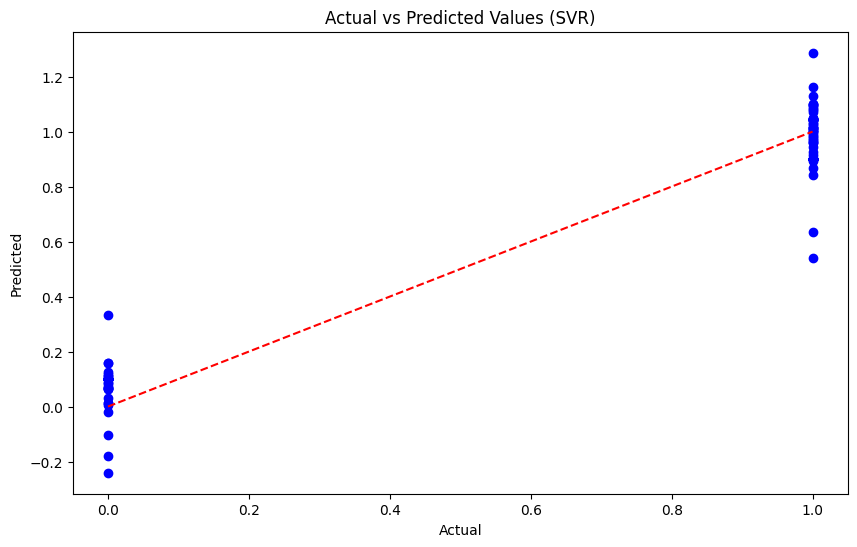

In [159]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (SVR)')
plt.show()

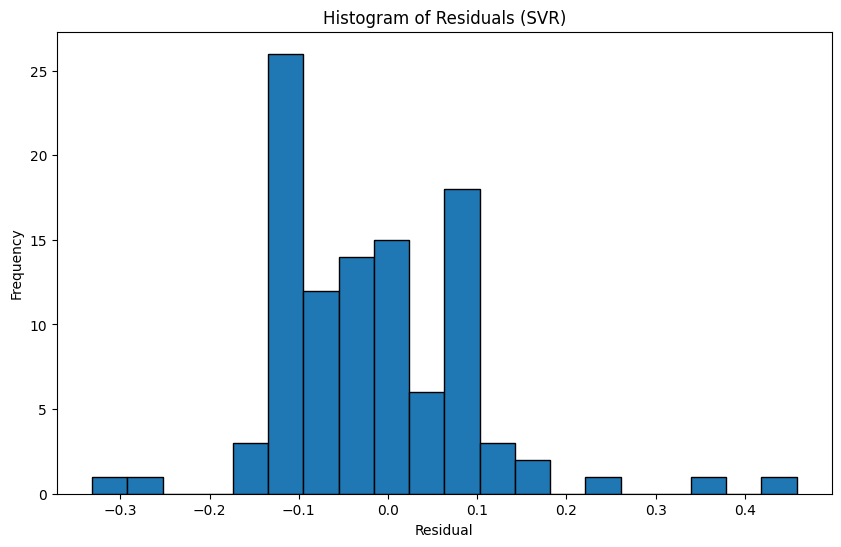

In [160]:
# Histogram of residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (SVR)')
plt.show()